In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

In [30]:
DATASET_DIR = "../dataset/classification/australian"
SAVE_NAME = "australian_ori.csv"

In [31]:
df = pd.read_csv(f"{DATASET_DIR}/{SAVE_NAME}")
df

A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  A13   A14  \
0     1  22.08  11.460   2   4   4  1.585   0   0    0    1    2  100  1213   
1     0  22.67   7.000   2   8   4  0.165   0   0    0    0    2  160     1   
2     0  29.58   1.750   1   4   4  1.250   0   0    0    1    2  280     1   
3     0  21.67  11.500   1   5   3  0.000   1   1   11    1    2    0     1   
4     1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   60   159   
..   ..    ...     ...  ..  ..  ..    ...  ..  ..  ...  ...  ...  ...   ...   
685   1  31.57  10.500   2  14   4  6.500   1   0    0    0    2    0     1   
686   1  20.67   0.415   2   8   4  0.125   0   0    0    0    2    0    45   
687   0  18.83   9.540   2   6   4  0.085   1   0    0    0    2  100     1   
688   0  27.42  14.500   2  14   8  3.085   1   1    1    0    2  120    12   
689   1  41.00   0.040   2  10   4  0.040   0   1    1    0    1  560     1   

     A15  
0      0  
1      0  
2      0  
3      1  
4      1  
..   ...  
685    1  
686    0  
687    1  
688    1  
689    1  

[690 rows x 15 columns]

In [32]:
y_feature = "A15"
print(df.groupby(y_feature)["A1"].count())

A15
0    383
1    307
Name: A1, dtype: int64


In [33]:
df.groupby(y_feature).median()

A1     A2    A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  A13  A14
A15                                                                     
0     1  27.67  2.21   2   6   4  0.415   0   0    0    0    2  174    2
1     1  30.67  4.46   2   9   4  2.000   1   1    3    0    2  120  222

In [34]:
df.groupby(y_feature).mean()

A1         A2        A3        A4        A5        A6        A7  \
A15                                                                          
0    0.684073  29.854230  3.839948  1.691906  6.140992  4.253264  1.257924   
1    0.671010  33.706482  5.904951  1.859935  8.908795  5.241042  3.427899   

           A8        A9       A10       A11       A12         A13          A14  
A15                                                                             
0    0.201044  0.224543  0.631854  0.443864  1.898172  199.412533   199.605744  
1    0.925081  0.680782  4.605863  0.475570  1.967427  164.804560  2039.859935

In [46]:
df["A9"].value_counts()

0    395
1    295
Name: A9, dtype: int64

In [44]:
domains = pd.qcut(df["A7"], 3, labels=['S', 'M', 'L'])
domains.value_counts()

M    238
S    234
L    218
Name: A7, dtype: int64

In [35]:
df.corr().iloc[-1,:].sort_values()

A13   -0.099972
A1    -0.013897
A11    0.031625
A12    0.115261
A2     0.161626
A14    0.175657
A4     0.194306
A3     0.206294
A6     0.246567
A7     0.322475
A5     0.373712
A10    0.406410
A9     0.458301
A8     0.720407
A15    1.000000
Name: A15, dtype: float64

In [37]:
pd.crosstab(df["A8"],df[y_feature])

A15    0    1
A8           
0    306   23
1     77  284

In [38]:
pd.crosstab(df["A9"],df[y_feature])

A15    0    1
A9           
0    297   98
1     86  209

In [36]:
split_col = "A8"
med = df[split_col].median()
print(sum(df[split_col]<med), sum(df[split_col]>=med))

329 361


In [18]:
split_col = "PAY_0"
med = df[split_col].median()
print(sum(df[split_col]<med), sum(df[split_col]>=med))

8445 21555


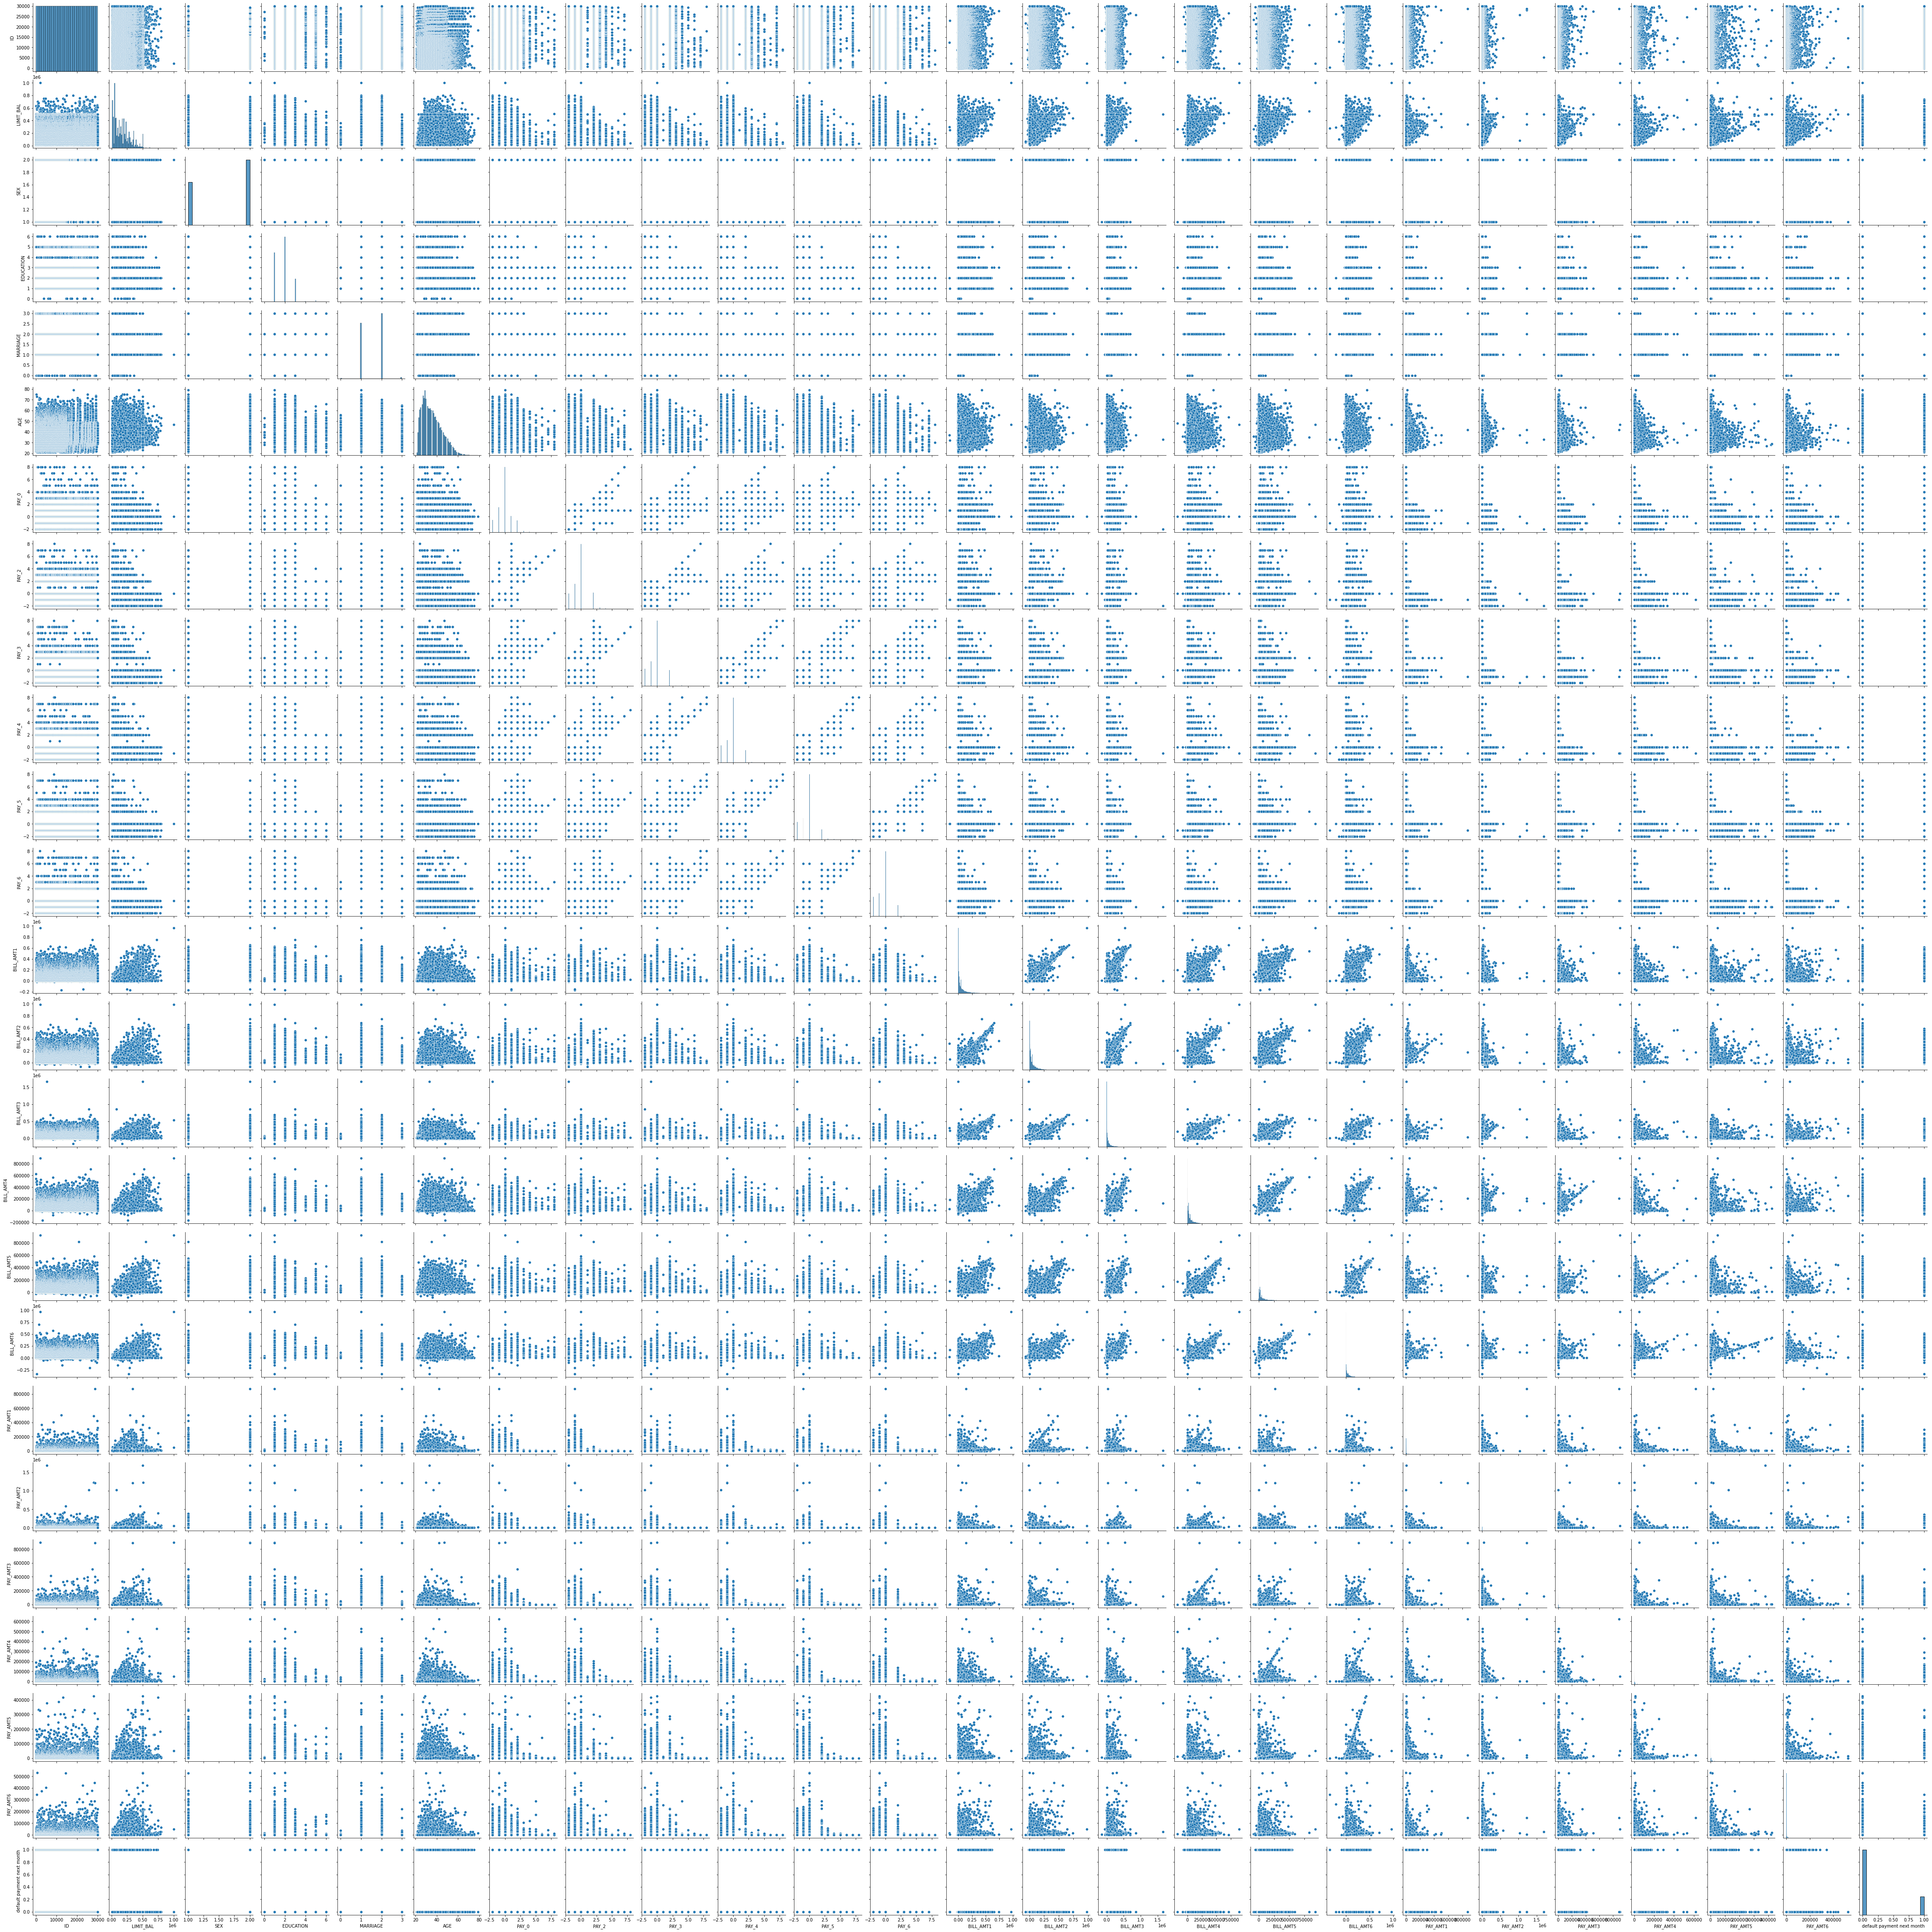

In [10]:
sns.pairplot(df)

variance of Wavelet Transformed image (continuous)で分割

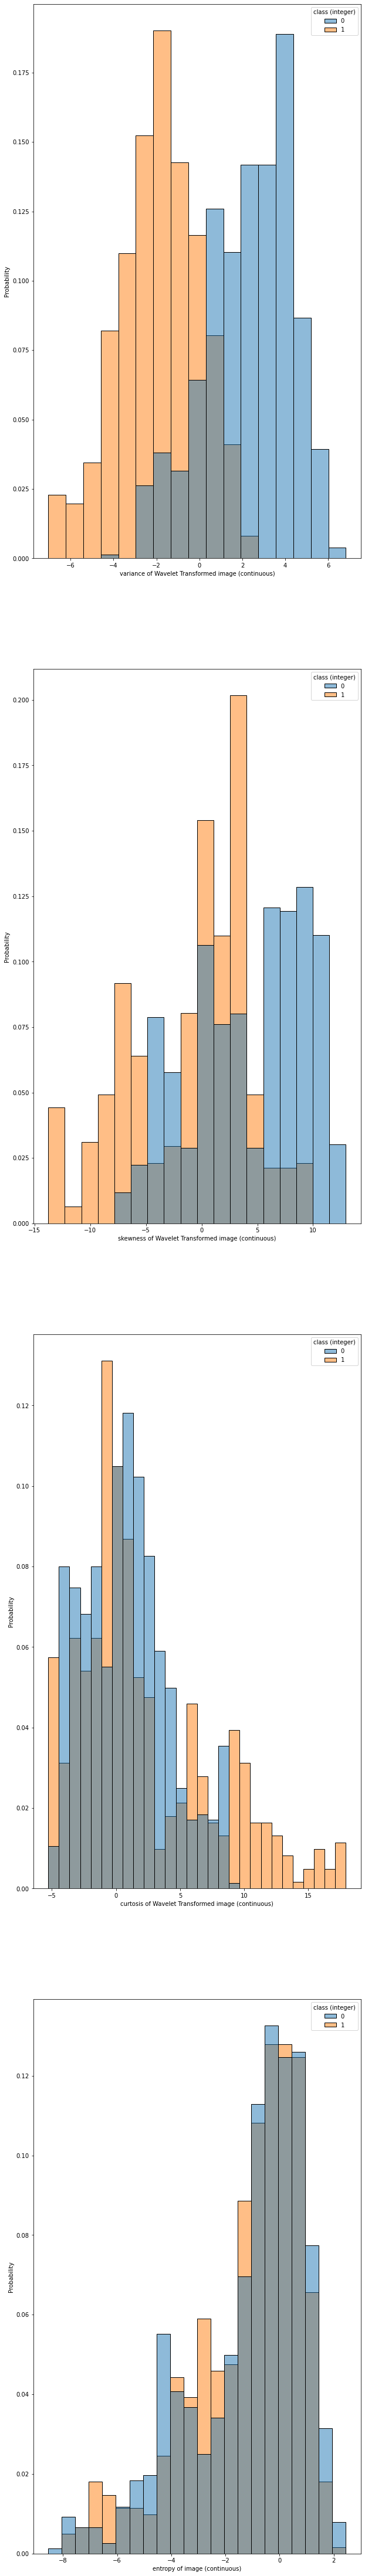

In [7]:
fig, ax = plt.subplots(len(df.columns[:-1]),1, figsize=(10,80))
for i, col in enumerate(df.columns[:-1]):
    g = sns.histplot(x=col, hue="class (integer)", stat="probability", common_norm=False, data=df, ax=ax[i], )

# t-sne

In [5]:
features_ori = df.drop(columns=["y","contact"])
is_cat_cols = features_ori.dtypes == object
cat_cols = features_ori.columns[is_cat_cols]
num_cols = features_ori.columns[~is_cat_cols]

onehot = OneHotEncoder(sparse=False)
features_cat = onehot.fit_transform(features_ori[cat_cols])

features_num = features_ori[num_cols].values

print(features_cat.shape, features_num.shape)
features = np.concatenate([features_num, features_cat], axis=1)
features.shape

(41188, 51) (41188, 10)


(41188, 61)

In [6]:
flag = (df["contact"]=="telephone").values
features[flag].shape

(15044, 61)

In [7]:
tsne = TSNE(perplexity=50, random_state=0)
features_embedd = tsne.fit_transform(features)

In [8]:
df_embedd = pd.DataFrame(features_embedd, columns=["embedd_x","embedd_y"])
df_embedd["contact"] = df["contact"]
df_embedd["y"] = df["y"]

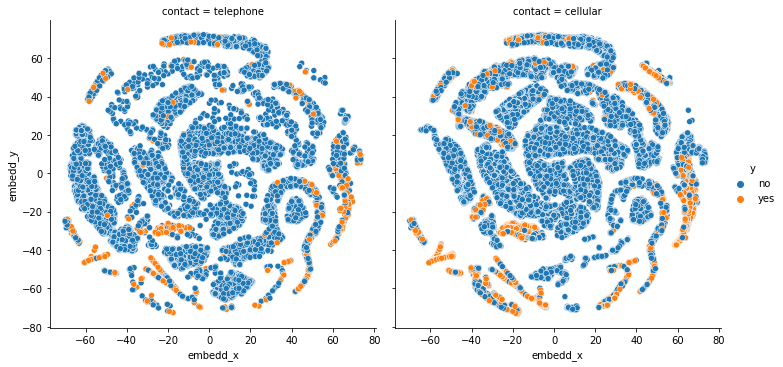

In [9]:
sns.relplot(x="embedd_x", y="embedd_y", col="contact", hue="y", data=df_embedd)